In [2]:
import pandas as pd
import numpy as np

# Uniform Distribution


- All intervals of the same lenght are equally probable.
- Used in programming languages to generate pseudo-randon numbers

In [7]:
low = 1
high = 10
count = 10000 #the higher the count the more even the distribution will be , look at the histogram 

u = pd.Series(
    np.random.uniform(low, high, count)
)

u.head()

0    8.667641
1    8.597787
2    7.549431
3    8.918059
4    6.914217
dtype: float64

In [8]:
u.describe()

count    10000.000000
mean         5.520476
std          2.596530
min          1.000825
25%          3.265279
50%          5.564508
75%          7.735321
max          9.999571
dtype: float64

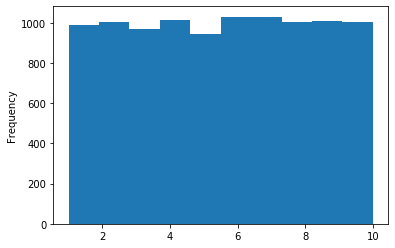

In [9]:
u.plot(kind = 'hist')

# Scipy Uniform

In [10]:
from scipy.stats import uniform

uniform.rvs(size = 10) #Between 0 and 1

array([0.23437033, 0.85707603, 0.27588818, 0.58855758, 0.32179871,
       0.13998818, 0.22934603, 0.62182863, 0.2486827 , 0.84600834])

Generate an array of evenly spaced numbers over a specified interval:

In [11]:
arr = np.linspace(0, 1, 5) # start , stop, count (inclusive)
arr

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [12]:
df = pd.DataFrame({
    'x': arr,
    'y': [uniform.pdf(i) for i in arr]
})

df

,x,y
0,0.00,1.0
1,0.25,1.0
2,0.50,1.0
3,0.75,1.0
4,1.00,1.0


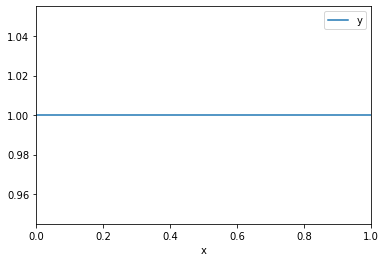

In [13]:
df.set_index('x').plot(kind  = 'line')

In [14]:
df['cdf'] = df['x'].apply(lambda x: uniform.cdf(x))

df

,x,y,cdf
0,0.00,1.0,0.00
1,0.25,1.0,0.25
2,0.50,1.0,0.50
3,0.75,1.0,0.75
4,1.00,1.0,1.00


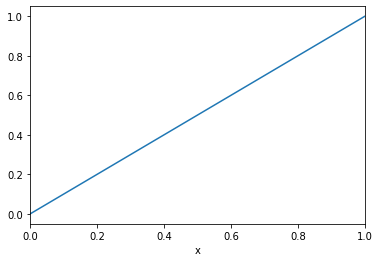

In [15]:
df.set_index('x')['cdf'].plot(kind  = 'line')

# Normal Distribution

In [29]:
n = pd.Series(
    np.random.normal(10, 1, 1000) # mean, std, count
)

n.head()

0     9.246599
1     9.952862
2     7.635671
3     9.761810
4    10.480249
dtype: float64

In [30]:
n.describe() #always approximates, due to small sample or count

count    1000.000000
mean        9.982684
std         0.983264
min         6.928832
25%         9.319428
50%         9.983549
75%        10.672804
max        13.130364
dtype: float64

In [31]:
n.median() #middle number , average of mid point

9.983549335728036

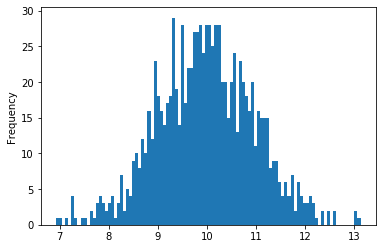

In [32]:
n.plot(kind = 'hist', bins = 100)

#Write a script to find the number of values within 1 standard deviation of mean:

In [33]:
mu = n.mean()
sigma = n.std()

len([x for x in n if (mu - sigma) < x < (mu + sigma)])

680

Number of values within 2 standard deviations of mean:

In [34]:
len([x for x in n if (mu - (2 * sigma)) < x < (mu + (2 * sigma))])

950

Scipy norm

In [35]:
from scipy.stats import norm

df2 = pd.DataFrame({
    'x': np.linspace(9, 11, 9) # low, high , count
})

df2

,x
0,9.00
1,9.25
2,9.50
3,9.75
4,10.00
5,10.25
6,10.50
7,10.75
8,11.00


In [36]:
df2.describe()

,x
count,9.000000
mean,10.000000
std,0.684653
min,9.000000
25%,9.500000
50%,10.000000
75%,10.500000
max,11.000000


In [37]:
df2['x'].median()

10.0

In [38]:
df2['y'] = df2['x'].apply(lambda x: norm.pdf(x, 10)) # value, mean
df2.head()

,x,y
0,9.00,0.241971
1,9.25,0.301137
2,9.50,0.352065
3,9.75,0.386668
4,10.00,0.398942


In [39]:
df2['y'].sum() #area under the value

2.9626254808836263

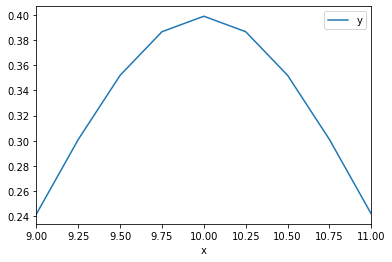

In [40]:
df2.set_index('x').plot(kind = 'line')

In [41]:
norm.cdf(10, 10) #val, mean


0.5

In [42]:
df2['cdf'] = df2['x'].apply(lambda x: norm.cdf(x, 10)) # value, mean
df2.head()

,x,y,cdf
0,9.00,0.241971,0.158655
1,9.25,0.301137,0.226627
2,9.50,0.352065,0.308538
3,9.75,0.386668,0.401294
4,10.00,0.398942,0.500000


In [43]:
df2.query('x == 10') #pick the row with the wanted value

,x,y,cdf
4,10.0,0.398942,0.5


# Exponential Distribution

- Describes the time between independent events which occur continously at a constant average rate(e.g., how long users stay on a webpage)
- Values must be greater than or equal to zero

In [44]:
e = pd.Series(
    np.random.exponential(10, 1000) #mean, count
)

e.head()

0    14.150543
1     1.697520
2    11.415544
3     5.479813
4     4.634339
dtype: float64

In [45]:
e.describe() #note mean == std

count    1000.000000
mean       10.194428
std        10.460858
min         0.009481
25%         2.835791
50%         7.106120
75%        13.936980
max        91.045940
dtype: float64

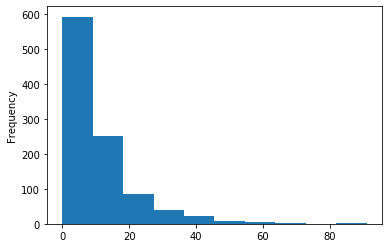

In [46]:
e.plot(kind = 'hist')

In [49]:

df3 = pd.DataFrame({
    'x': [i for i in range(1, 11)],
})

df3



,x
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [50]:
from scipy.stats import expon


df3['y'] = df3['x'].apply(lambda x: expon.pdf(x)) # value, mean
df3.head()

,x,y
0,1,0.367879
1,2,0.135335
2,3,0.049787
3,4,0.018316
4,5,0.006738


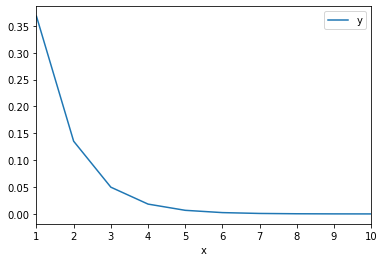

In [52]:
df3.set_index('x').plot(kind = 'line') #setting up the x as index and not calling it out in the plot

In [53]:
expon.pdf(5, scale = 4) #probability of someone spending 5 minutes when the mean is 4

0.07162619921504752

# Scipy expon.cdf

In [55]:
# def exp_cdf(x , mean = 1):


df3['cdf'] = df3['x'].apply(lambda x: expon.cdf(x, scale = 4))

df3.head()

,x,y,cdf
0,1,0.367879,0.221199
1,2,0.135335,0.393469
2,3,0.049787,0.527633
3,4,0.018316,0.632121
4,5,0.006738,0.713495


In [56]:
exp_cdf(5, 4)

NameError: name 'exp_cdf' is not defined

In [57]:
expon.cdf(5, scale = 4)

0.7134952031398099